In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=load_breast_cancer()

In [4]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
X=pd.DataFrame(data.data,columns=data.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
y=pd.DataFrame(data.target,columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [22]:
X.shape

(569, 30)

In [23]:
y.shape

(569, 1)

<Axes: ylabel='target'>

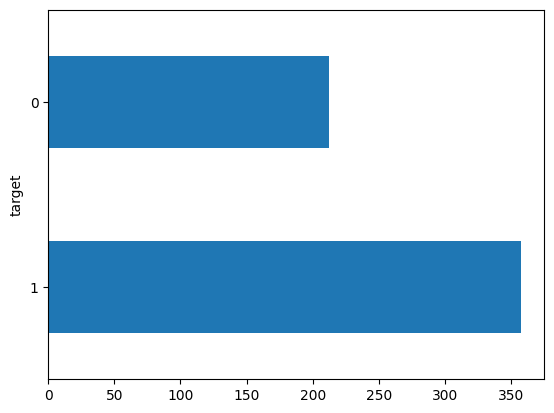

In [18]:

y.target.value_counts().plot(kind='barh')

### OverSampling

In [20]:
from imblearn.over_sampling import SMOTE

In [24]:
class_balancer=SMOTE()

print("X shape before smote",X.shape,"y shape before smote",y.shape)
X_sm,y_sm=class_balancer.fit_resample(X,y)
print("X shape after smote",X_sm.shape,"y shape after smote",y_sm.shape)


X shape before smote (569, 30) y shape before smote (569, 1)
X shape after smote (714, 30) y shape after smote (714, 1)


<Axes: ylabel='target'>

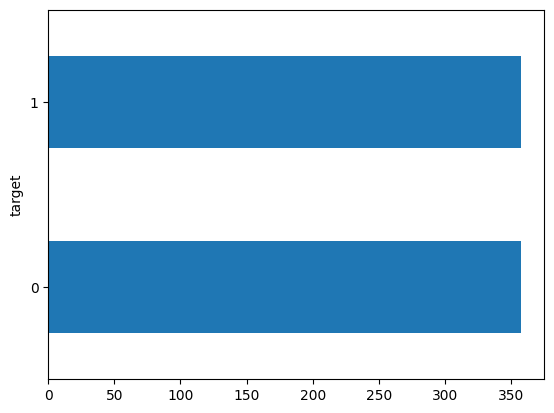

In [25]:
y_sm.target.value_counts().plot(kind='barh')


### Selecting Best Classifier

In [51]:
seed=7
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1'
dc={}

for name, model in models:
	kfold = model_selection.KFold(n_splits=10,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_sm, y_sm, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
	dc[name]=cv_results.max()
	print(msg)



/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-pac

LR: 0.960801 (0.017069)
LDA: 0.965242 (0.023939)
KNN: 0.936224 (0.029309)


/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pratik.kujur/D

DT: 0.926598 (0.031043)
NB: 0.935150 (0.040656)
SVM: 0.903588 (0.032693)


/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pratik.kujur

RF: 0.970560 (0.016264)


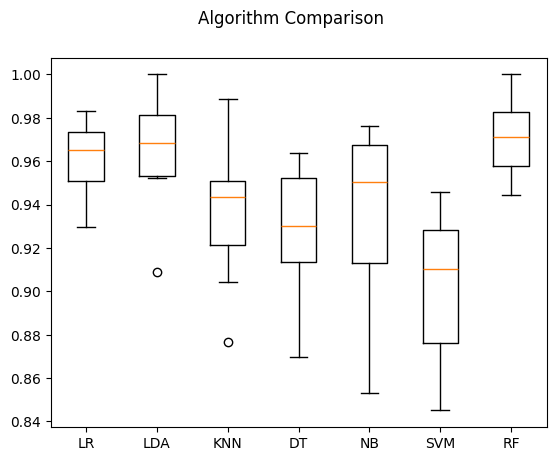

In [52]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [53]:
dc

{'LR': np.float64(0.9830508474576272),
 'LDA': np.float64(1.0),
 'KNN': np.float64(0.9885057471264368),
 'DT': np.float64(0.963855421686747),
 'NB': np.float64(0.9761904761904762),
 'SVM': np.float64(0.9459459459459459),
 'RF': np.float64(1.0)}

<BarContainer object of 7 artists>

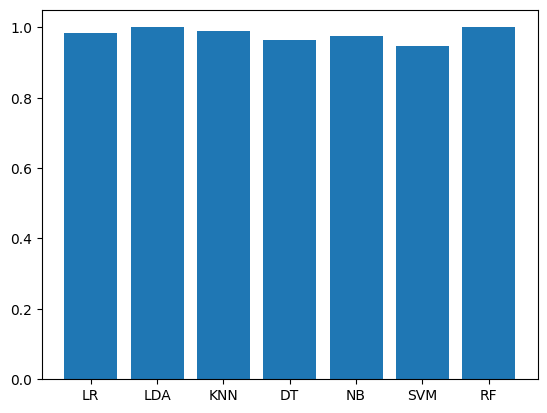

In [55]:
plt.bar(dc.keys(),dc.values())

In [56]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid={
    'criterion':('gini', 'entropy', 'log_loss'),
    'max_features':('sqrt', 'log2'),
}

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_sm, y_sm, test_size=0.2, random_state=42)

In [62]:
rf=RandomForestClassifier()
clf=GridSearchCV(rf,param_grid=param_grid)
clf.fit(X_train,y_train)

/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/pratik.kujur/Desktop/Projects/Mlops-Classification-End-to-end/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/pratik

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_features': ('sqrt', 'log2')})

In [65]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [68]:
from sklearn.metrics import classification_report

report=classification_report(y_pred,y_test)
print(report)



              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.97      0.97      0.97        69

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

